In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv(r"E:\classpython\Supermart Grocery Sales - Retail Analytics Dataset.csv")
df

,Order ID,Customer Name,Category,City,Order Date,Region,Sales,Discount,Profit
0,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,OD5,Ridhesh,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,Eggs,Madurai,12/24/2015,West,945,0.16,359.10
9990,OD9991,Alan,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70
9991,OD9992,Ravi,Rice,Bodi,06-06-2017,West,1567,0.16,501.44
9992,OD9993,Peer,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24


In [3]:
print(df.head())

  Order ID Customer Name          Category         City  Order Date Region  \
0      OD1        Harish           Masalas      Vellore  11-08-2017  North   
1      OD2         Sudha     Health Drinks  Krishnagiri  11-08-2017  South   
2      OD3       Hussain      Atta & Flour   Perambalur  06-12-2017   West   
3      OD4       Jackson  Fresh Vegetables   Dharmapuri  10-11-2016  South   
4      OD5       Ridhesh   Organic Staples         Ooty  10-11-2016  South   

   Sales  Discount  Profit  
0   1254      0.12  401.28  
1    749      0.18  149.80  
2   2360      0.21  165.20  
3    896      0.25   89.60  
4   2355      0.26  918.45  


In [4]:
print(df.tail())

     Order ID Customer Name      Category         City  Order Date Region  \
9989   OD9990        Sudeep          Eggs      Madurai  12/24/2015   West   
9990   OD9991          Alan      Biscuits  Kanyakumari  07-12-2015   West   
9991   OD9992          Ravi          Rice         Bodi  06-06-2017   West   
9992   OD9993          Peer        Spices   Pudukottai  10/16/2018   West   
9993   OD9994        Ganesh  Atta & Flour  Tirunelveli   4/17/2018   West   

      Sales  Discount  Profit  
9989    945      0.16  359.10  
9990   1195      0.26   71.70  
9991   1567      0.16  501.44  
9992   1659      0.15  597.24  
9993   1034      0.28  165.44  


Analysis of Total Profit Across Different Product Categories

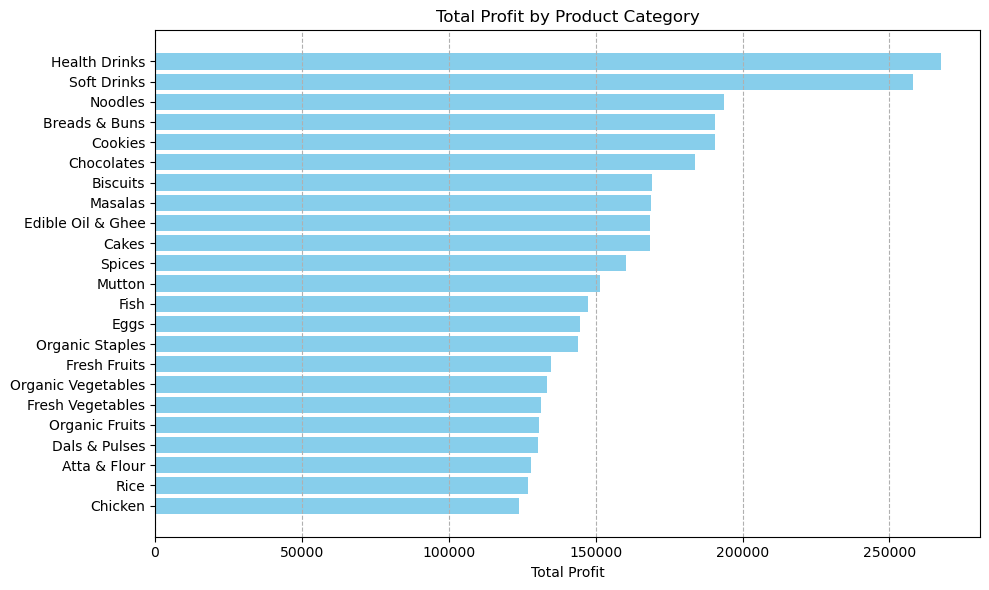

In [5]:
category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(category_profit.index, category_profit.values, color="skyblue")
plt.xlabel("Total Profit")
plt.title("Total Profit by Product Category")
plt.grid(axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

 Conclusion:
The most profitable categories are easily identifiable here. Categories like Organic Staples or Health Drinks may show higher total profit, suggesting they are key revenue drivers for the business.

Contribution of Each Region to Overall Sales

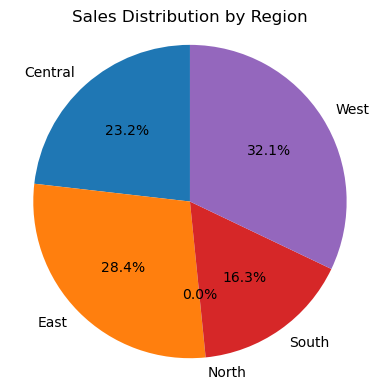

In [6]:
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(4, 4))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Region")
plt.axis("equal")
plt.tight_layout()
plt.show()


This pie chart clearly shows which regions dominate sales. For example, the South or West might contribute a larger slice of total sales, guiding regional marketing or expansion plans.

Impact of Discounting on Profitability

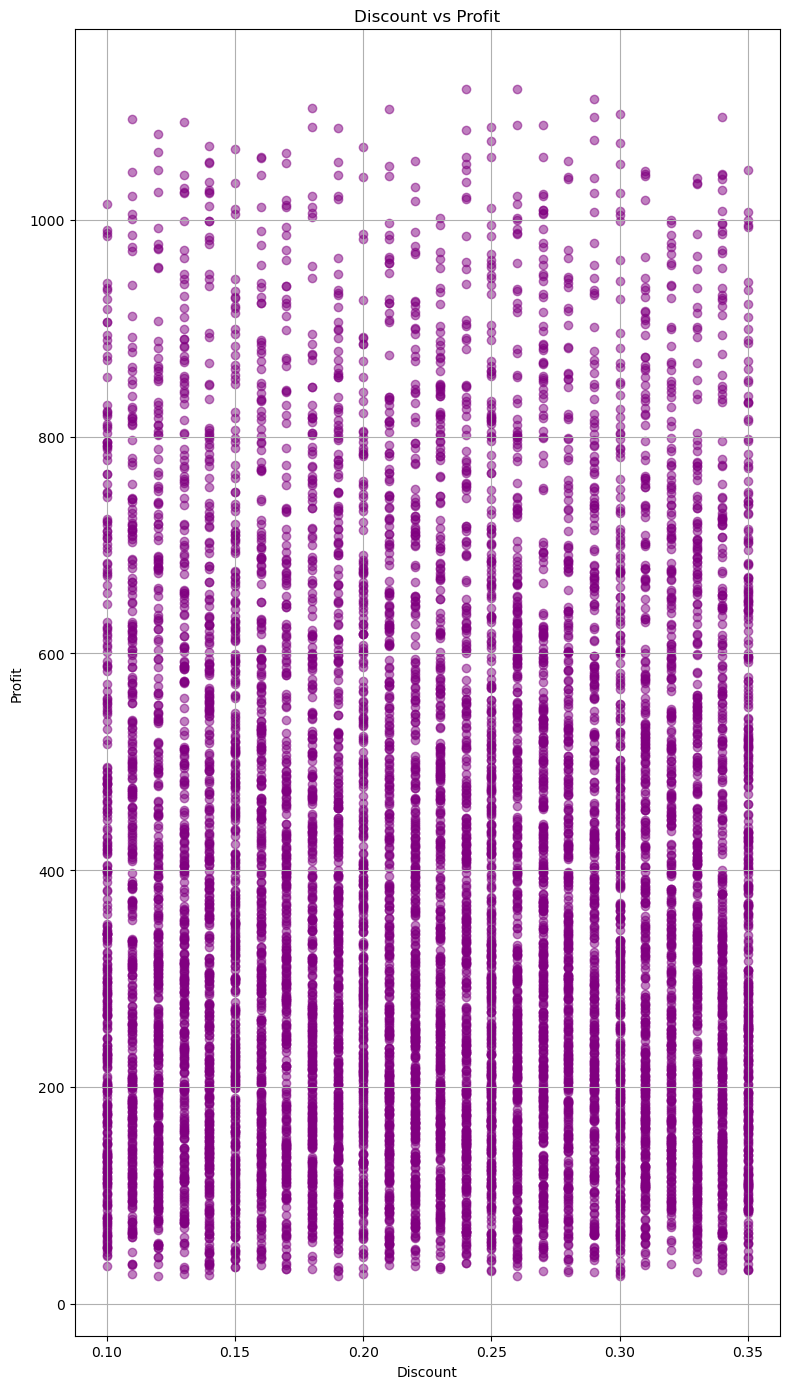

In [7]:
plt.figure(figsize=(8, 14))
plt.scatter(df["Discount"], df["Profit"], alpha=0.5, color='purple')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


There is a visible negative trend — as discounts increase, profits often decrease. This suggests over-discounting may hurt the business, and discount strategies should be optimized.

Average Discount Across Product Categories – Line Chart Analysis

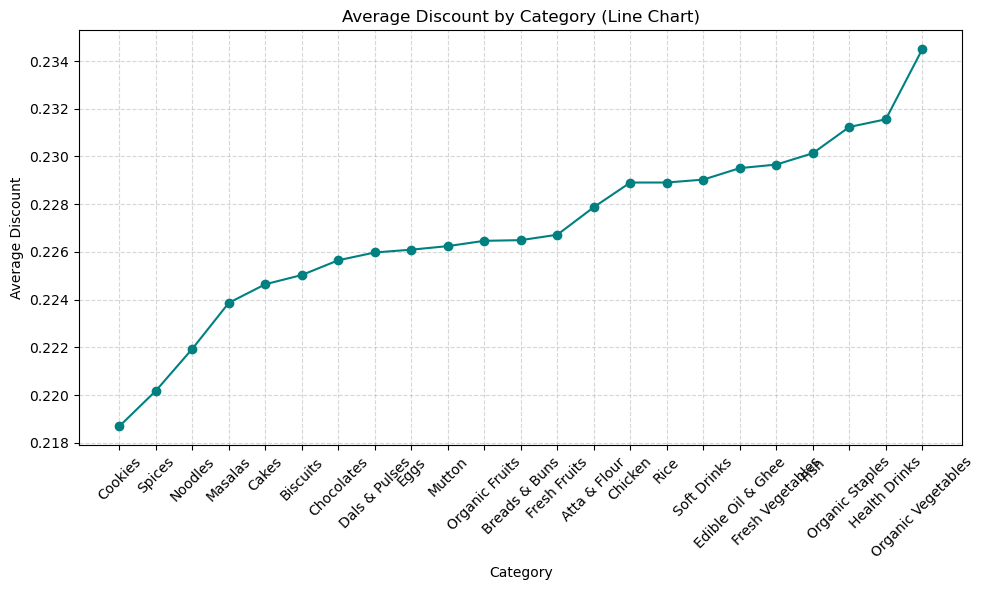

In [45]:
import matplotlib.pyplot as plt


avg_discount = df.groupby("Category")["Discount"].mean().sort_values(ascending=True)


plt.figure(figsize=(10, 6))
plt.plot(avg_discount.index, avg_discount.values, marker='o', linestyle='-', color='teal')

plt.title("Average Discount by Category (Line Chart)")
plt.xlabel("Category")
plt.ylabel("Average Discount")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Categories with higher discounts may indicate low demand or aggressive pricing, while lower discounts suggest strong or premium-performing products.

How Total Profit Accumulated Over Time

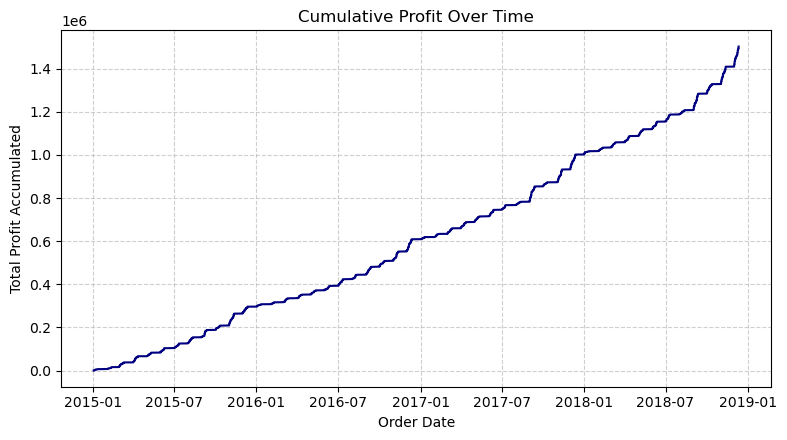

In [46]:

df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df = df.sort_values("Order Date")


df['Cumulative Profit'] = df['Profit'].cumsum()

plt.figure(figsize=(8, 4.5))
plt.plot(df["Order Date"], df["Cumulative Profit"], color='navy')
plt.title("Cumulative Profit Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Profit Accumulated")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The cumulative line graph helps visualize business growth over time. Spikes or plateaus in profit can indicate seasonal boosts or drops in performance.

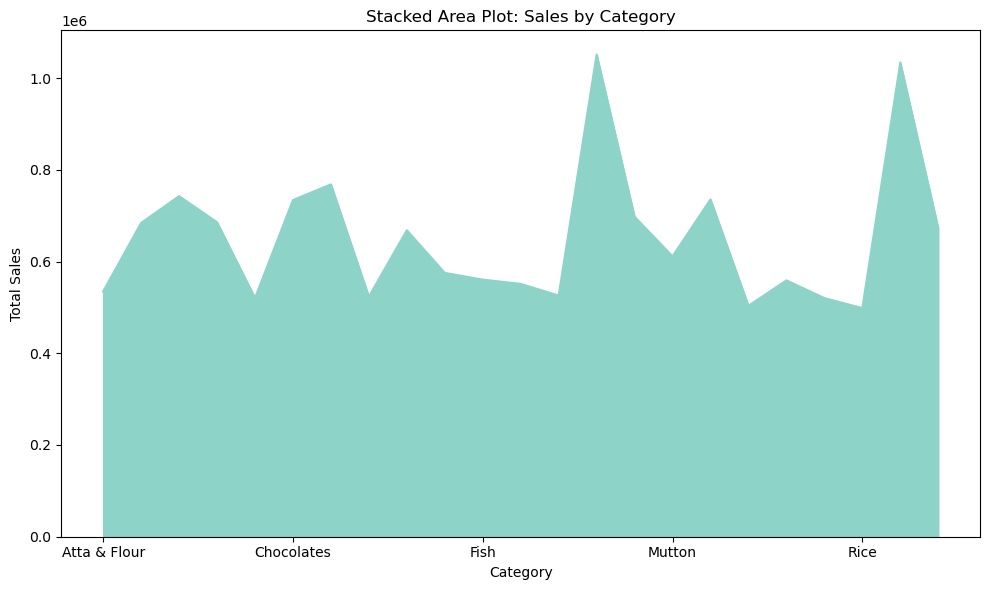

In [10]:



area_data = df.groupby('Category')['Sales'].sum().fillna(0)

area_data.T.plot(kind='area', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title("Stacked Area Plot: Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
